<a href="https://colab.research.google.com/github/missryta/411w8/blob/master/Ransomwareattack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree  import DecisionTreeClassifier
from sklearn.metrics import accuracy_score ,  f1_score, confusion_matrix ,precision_score, recall_score, roc_curve
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
# Load the dataset
url = "https://raw.githubusercontent.com/securycore/MLRD-Machine-Learning-Ransomware-Detection/master/data_file.csv"
df = pd.read_csv(url)

In [28]:
# Select features and target variable
X = df[['Machine', 'DebugSize', 'DebugRVA', 'MajorImageVersion', 'MajorOSVersion',
        'ExportRVA', 'ExportSize', 'IatVRA', 'MajorLinkerVersion', 'MinorLinkerVersion',
         'NumberOfSections', 'SizeOfStackReserve', 'DllCharacteristics', 'ResourceSize', 'BitcoinAddresses']]
y = df['Benign']

from sklearn.preprocessing import StandardScaler

In [29]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler


In [30]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [31]:
# Train base learners (Naive Bayes and Support Vector Machine) on the training data
nb_model = GaussianNB()
svm_model = SVC(kernel='linear')

nb_model.fit(X_train, y_train)
svm_model.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [32]:
# Make predictions using base learners
nb_pred = nb_model.predict(X_test)
svm_pred = svm_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [33]:
svm_model.fit(pd.DataFrame(X_train_scaled, columns=X_train.columns), y_train)

SVC(kernel='linear')

In [34]:
# Combine predictions of base learners as meta-learner input
meta_model_input = pd.DataFrame({'NB': nb_pred, 'SVM': svm_pred})

In [35]:
# Train meta-learner (Decision Tree) on base learners' predictions
dt_meta_model = DecisionTreeClassifier()
dt_meta_model.fit(meta_model_input, y_test)

DecisionTreeClassifier()

In [36]:
# Make predictions using the base learners on the training data for the meta-learner
nb_train_pred = nb_model.predict(X_train)
svm_train_pred = svm_model.predict(X_train)

In [37]:
# Combine predictions of base learners on the training data as meta-learner input
meta_model_input_train = pd.DataFrame({'NB': nb_train_pred, 'SVM': svm_train_pred})

In [39]:
# Make predictions using the meta-learner on the training data
meta_pred = dt_meta_model.predict(meta_model_input)

In [40]:
# Evaluate the stacking model
accuracy = accuracy_score(y_test, meta_pred)
f1 = f1_score(y_test, meta_pred)
precision = precision_score(y_test, meta_pred)
recall = recall_score(y_test, meta_pred)

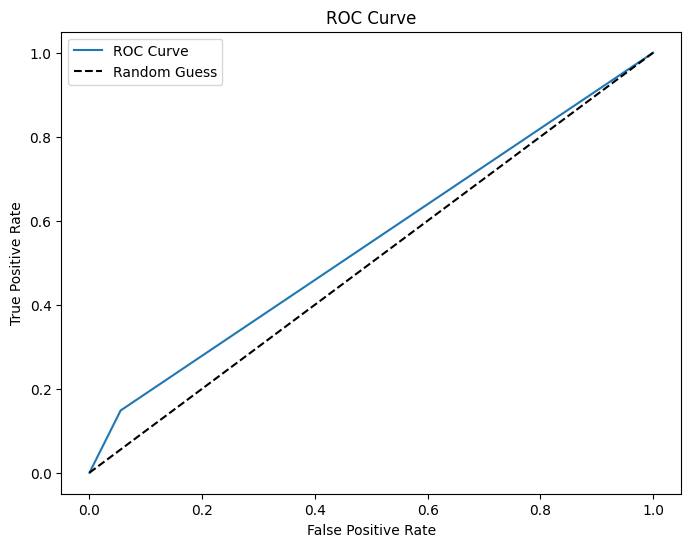

In [42]:
from sklearn.metrics import roc_curve

# Assuming 'y_test' are the true labels and 'meta_pred' are the predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, meta_pred)

# Now you can plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

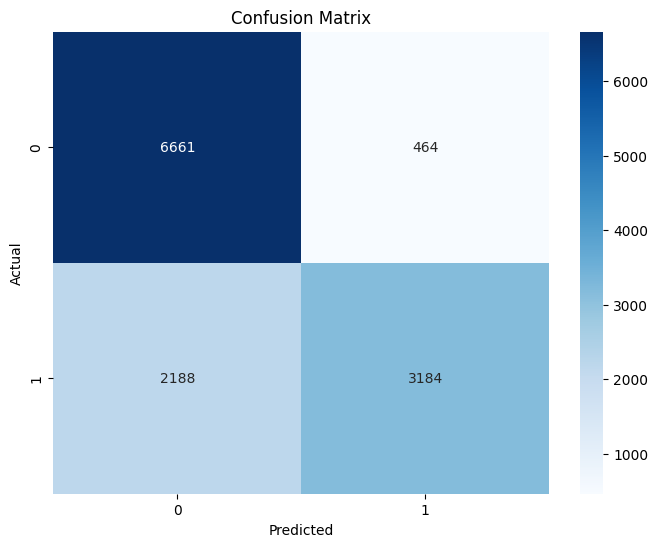

In [56]:
# Train a model and assign it to the variable 'model'
model = SVC()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict labels for test data using the trained model
y_pred = model.predict(X_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [58]:
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.6023045530927422
F1 Score: 0.2426089606827187
Precision: 0.66890756302521
Confusion Matrix:
 [[6661  464]
 [2188 3184]]


In [59]:
BenignCount = df['Benign'].value_counts()
print(BenignCount)

Benign
0    35367
1    27118
Name: count, dtype: int64


In [60]:
df.shape

(62485, 18)

In [61]:
df.dtypes

FileName              object
md5Hash               object
Machine                int64
DebugSize              int64
DebugRVA               int64
MajorImageVersion      int64
MajorOSVersion         int64
ExportRVA              int64
ExportSize             int64
IatVRA                 int64
MajorLinkerVersion     int64
MinorLinkerVersion     int64
NumberOfSections       int64
SizeOfStackReserve     int64
DllCharacteristics     int64
ResourceSize           int64
BitcoinAddresses       int64
Benign                 int64
dtype: object

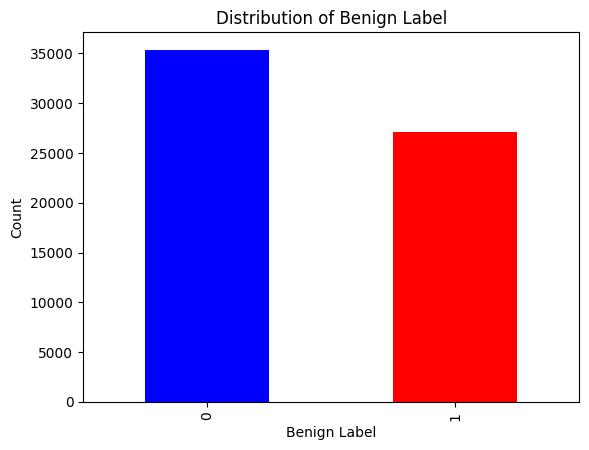

In [62]:
# Plot the distribution using a bar plot
BenignCount.plot(kind='bar', color=['blue', 'red'])

# Add labels and title
plt.xlabel('Benign Label')
plt.ylabel('Count')
plt.title('Distribution of Benign Label')

# Show plot
plt.show()

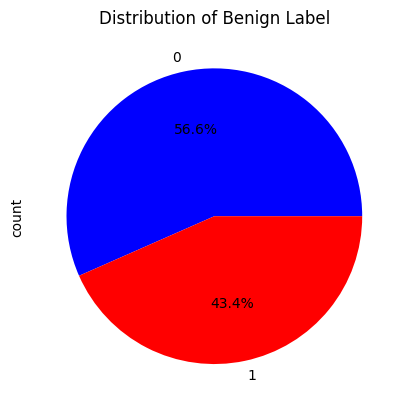

In [63]:
# Plot the distribution using a pie chart
BenignCount.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'red'])

# Add title
plt.title('Distribution of Benign Label')

# Show plot
plt.show()

In [64]:
df

,FileName,md5Hash,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
0,0124e21d-018c-4ce0-92a3-b9e205a76bc0.dll,79755c51e413ed3c6be4635fd729a6e1,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
1,05c8318f98a5d301d80000009c316005.vertdll.dll,95e19f3657d34a432eada93221b0ea16,34404,84,121728,10,10,126576,4930,0,14,10,8,262144,16864,1024,0,1
2,06054fba-5619-4a86-a861-ffb0464bef5d.dll,85c32641d77a54e19ba8ea4ab305c791,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
3,075822ac99a5d301660400009c316005.adhapi.dll,62e3b959d982ef534b66f819fe15f085,34404,84,19904,10,10,21312,252,18160,14,10,6,262144,16736,1040,0,1
4,090607dd9ba5d301ca0900009c316005.SensorsNative...,ae38c5f7d313ad0ff3bfb8826476767f,34404,84,97728,10,10,105792,1852,70592,14,10,7,262144,16736,1096,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62480,VirusShare_a43ceb5e5fffc793e0205d15a0606cb0,a43ceb5e5fffc793e0205d15a0606cb0,332,0,0,1,4,0,0,4096,6,0,3,1048576,0,23504,0,0
62481,VirusShare_0190dafc8304111a00fccf57340ea6a4,0190dafc8304111a00fccf57340ea6a4,332,0,0,7,10,0,0,0,7,0,7,1048576,0,15704,0,0
62482,VirusShare_0f3ca55979aaf59158d6b01140696e44,0f3ca55979aaf59158d6b01140696e44,332,0,0,0,4,0,0,404908,2,50,11,1048576,0,2364,0,0
62483,VirusShare_fca5ce35f1690db6babca5aa5d559535,fca5ce35f1690db6babca5aa5d559535,332,0,0,0,4,14448,70,4096,8,0,4,1048576,0,130296,0,0


In [69]:
df.describe()

,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
count,62485.000000,6.248500e+04,6.248500e+04,62485.000000,62485.000000,6.248500e+04,6.248500e+04,6.248500e+04,62485.000000,62485.000000,62485.000000,6.248500e+04,62485.000000,6.248500e+04,62485.000000,62485.000000
mean,6756.472657,2.587048e+04,1.541611e+05,58.785997,5.417524,8.953186e+05,4.094623e+05,1.466311e+05,9.782604,6.613171,4.751172,8.759830e+05,12966.031400,1.844664e+05,0.018004,0.433992
std,13345.499919,6.461396e+06,1.903142e+06,1114.068244,2.543697,3.779527e+07,2.851820e+07,1.124630e+06,9.047157,16.976465,2.138584,6.288189e+05,15762.725511,1.732625e+07,0.132968,0.495628
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,332.000000,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000e+00,0.000000e+00,4.096000e+03,6.000000,0.000000,3.000000,2.621440e+05,0.000000,1.080000e+03,0.000000,0.000000
50%,332.000000,0.000000e+00,0.000000e+00,0.000000,5.000000,0.000000e+00,0.000000e+00,8.520000e+03,9.000000,0.000000,5.000000,1.048576e+06,320.000000,2.496000e+03,0.000000,0.000000
75%,332.000000,2.800000e+01,1.283200e+04,6.000000,6.000000,2.875200e+04,1.040000e+02,6.553600e+04,11.000000,10.000000,6.000000,1.048576e+06,32768.000000,2.350400e+04,0.000000,1.000000
max,43620.000000,1.615155e+09,2.852127e+08,63325.000000,260.000000,2.147484e+09,2.415919e+09,6.615450e+07,255.000000,255.000000,33.000000,1.677722e+07,58632.000000,4.294942e+09,1.000000,1.000000


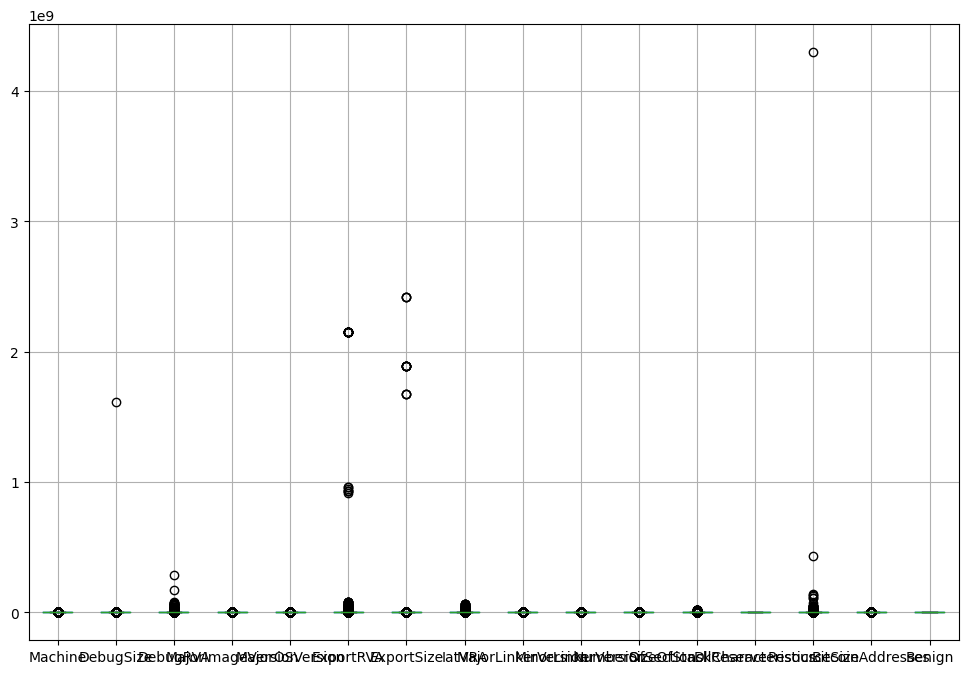

In [67]:
# Plot box plots for numerical features
df.boxplot(figsize=(12, 8))
plt.show()

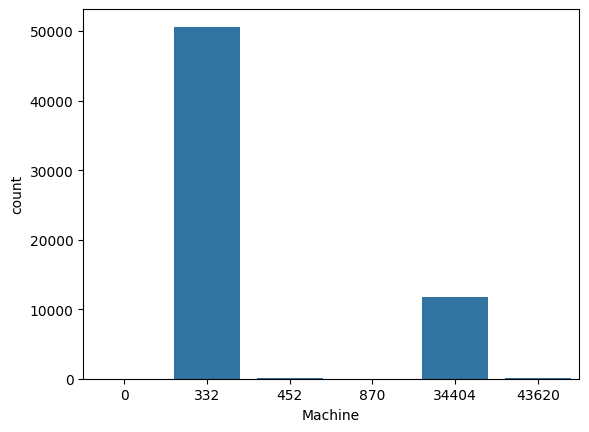

In [68]:
# Plot bar charts for categorical features
sns.countplot(x='Machine', data=df)
plt.show()

In [65]:
# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Compute correlation matrix for numeric columns
numeric_corr_matrix = df[numeric_cols].corr()

# Display the correlation matrix
print("Correlation Matrix for Numeric Columns:")
print(numeric_corr_matrix)

Correlation Matrix for Numeric Columns:
                     Machine  DebugSize  DebugRVA  MajorImageVersion  \
Machine             1.000000  -0.001924  0.057530           0.044044   
DebugSize          -0.001924   1.000000 -0.000287          -0.000207   
DebugRVA            0.057530  -0.000287  1.000000           0.016538   
MajorImageVersion   0.044044  -0.000207  0.016538           1.000000   
MajorOSVersion      0.380672  -0.002226  0.022162           0.042068   
ExportRVA          -0.005199  -0.000093  0.019699          -0.000102   
ExportSize         -0.006838  -0.000055 -0.001079          -0.000756   
IatVRA              0.077284  -0.000507  0.457697           0.012210   
MajorLinkerVersion  0.099463  -0.001671  0.031796           0.005562   
MinorLinkerVersion -0.019648  -0.001558 -0.006481          -0.006564   
NumberOfSections    0.220295  -0.003275  0.049066           0.026520   
SizeOfStackReserve -0.232794   0.001208 -0.009498          -0.027773   
DllCharacteristics  0.03

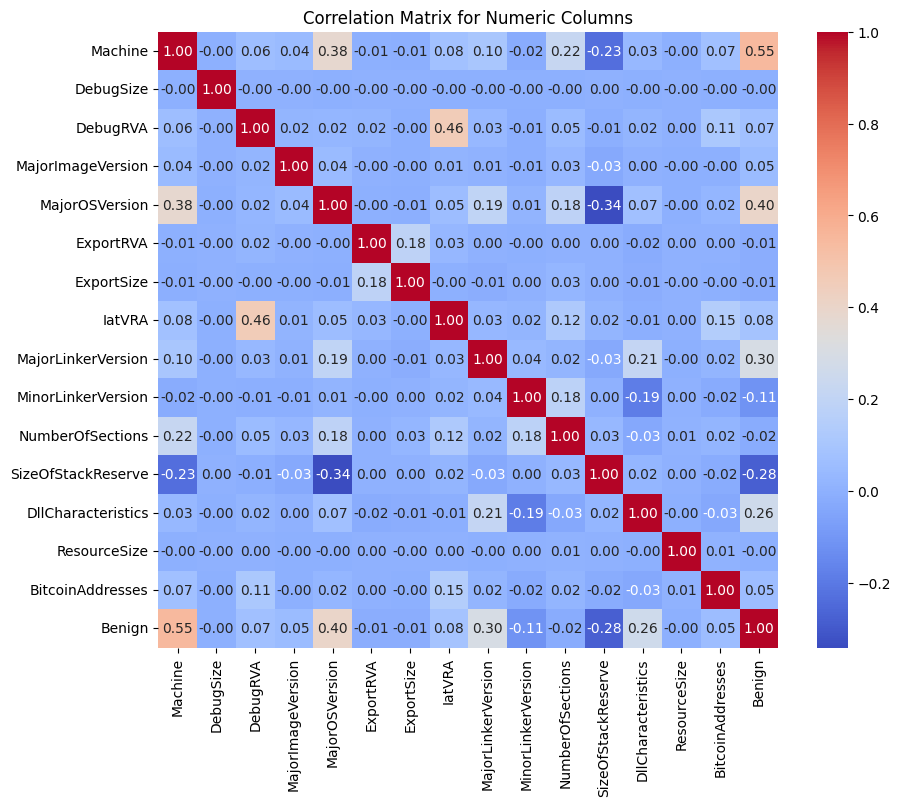

In [66]:
# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Compute correlation matrix for numeric columns
numeric_corr_matrix = df[numeric_cols].corr()

# Plot correlation matrix for numeric columns
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Numeric Columns')
plt.show()